In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon,uniform,randint

#Sklearn imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_val_predict,validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
data=pd.read_csv(r"EmployeeAttrition.csv")

In [31]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null int64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int32
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int32
MonthlyIncome               1

In [21]:
data.describe()
#data.dropna
#data.drop('BusinessTravel',axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [29]:
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()
categorical_feature_mask.head()

Age               False
Attrition         False
BusinessTravel    False
DailyRate         False
Department        False
dtype: bool

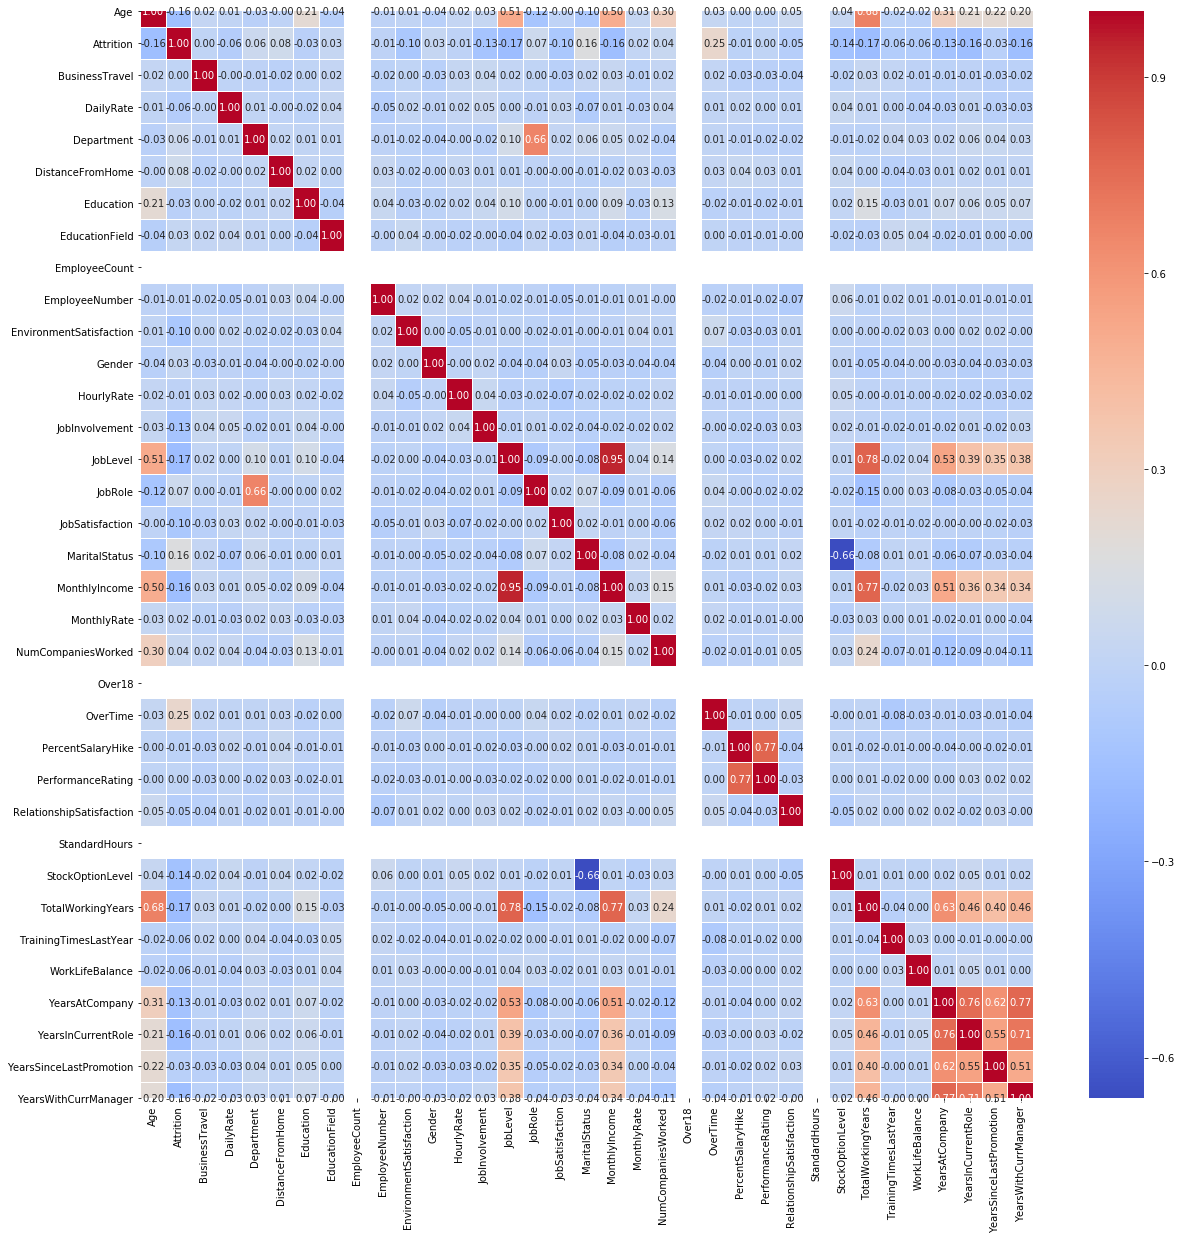

In [17]:
correl=data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correl,xticklabels=correl.columns.values,
            yticklabels=correl.columns.values,annot=True,cmap="coolwarm",fmt="0.2f",linewidth=0.01)

In [8]:
data.info()
data.Attrition[data.Attrition == 'Yes'] = 1
data.Attrition[data.Attrition == 'No'] = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

C:\Users\ADITYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADITYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [33]:
all_features=list(data.columns)
all_features.remove('Attrition')
#data=data.astype(float)
y=data['Attrition']#target column seperation
x=data[all_features]#dset without target column
print(y)
#data['Travel_Rarely']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0) #Basic train_test_split works here

print ("Shape of x_train: ", x_train.shape)
print ("Shape of y_train: ", y_train.shape)
print ("Shape of x_test: ", x_test.shape)
print ("Shape of y_test: ", y_test.shape)

#Data is well balanced between the 2 classes in both train/test
print ("\nValue counts for y_train:\n", y_train.value_counts())
print ("\nValue counts for y_test:\n", y_test.value_counts())

Shape of x_train:  (1102, 34)
Shape of y_train:  (1102,)
Shape of x_test:  (368, 34)
Shape of y_test:  (368,)

Value counts for y_train:
 0    923
1    179
Name: Attrition, dtype: int64

Value counts for y_test:
 0    310
1     58
Name: Attrition, dtype: int64


In [35]:
print ("\nx_train descriptive statistics:\n\n",x_train.agg([np.mean, np.std]))
print ("\nx_test descriptive statistics:\n\n",x_test.agg([np.mean, np.std]))# all data seem to b standardised..


x_train descriptive statistics:

             Age  BusinessTravel   DailyRate  Department  DistanceFromHome  \
mean  36.823049        1.602541  804.224138    1.253176          9.109800   
std    9.024263        0.671134  407.496329    0.529222          8.087269   

      Education  EducationField  EmployeeCount  EmployeeNumber  \
mean   2.930127        2.240472            1.0     1024.783122   
std    1.003907        1.337394            0.0      598.045333   

      EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
mean                 2.749546  ...                  2.698730           80.0   
std                  1.097795  ...                  1.084101            0.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
mean          0.804900          11.174229               2.768603   
std           0.859342           7.742950               1.253512   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
mean          2.76225        6

In [36]:
def classification_accuracy_report(actual,predicted):
    print ("\nAccuracy Score on Test Data: ", accuracy_score(actual,predicted))
    print ("\nConfusion Matrix on Test Data:\n", confusion_matrix(actual,predicted))
    print ("\nClassification Report on Test Data:\n",classification_report(actual,predicted))

In [37]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)# logistic regression model

C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
y_pred=clf.predict(x_test)

In [39]:
clf.score(x_test, y_test)

0.8831521739130435

In [40]:
classification_accuracy_report(y_test,y_pred)


Accuracy Score on Test Data:  0.8831521739130435

Confusion Matrix on Test Data:
 [[304   6]
 [ 37  21]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       310
           1       0.78      0.36      0.49        58

    accuracy                           0.88       368
   macro avg       0.83      0.67      0.71       368
weighted avg       0.87      0.88      0.86       368



In [41]:
def features_rank(feature_importance_coefficients,index_labels):
    feature_importance_coefficients=map(abs,feature_importance_coefficients)
    feature_with_coeff=zip(feature_importance_coefficients,index_labels)
    print ("\nFeatures and their importances:\n", feature_with_coeff)
    ranked_features=sorted(feature_with_coeff, key=lambda x: x[0],reverse=True)
    print ("\nRanked Features:\n", [elem[1] for elem in ranked_features])

In [42]:
sgd_classifier=linear_model.SGDClassifier(max_iter=10000,loss='log',penalty='l2',random_state=42)
scores=cross_val_score(sgd_classifier,x_train,y_train,cv=5)
print ("l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER\n")
print ("Cross Validation Scores on the training set: ", scores)

sgd_classifier.fit(x_train,y_train)
y_pred = sgd_classifier.predict(x_test)

classification_accuracy_report(y_test,y_pred)

coeff_list=list(itertools.chain(*sgd_classifier.coef_.tolist())) #Converting numpy array to list and then flattening
features_rank(coeff_list,all_features)

l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER

Cross Validation Scores on the training set:  [0.83710407 0.83710407 0.83710407 0.70454545 0.8173516 ]

Accuracy Score on Test Data:  0.8125

Confusion Matrix on Test Data:
 [[291  19]
 [ 50   8]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       310
           1       0.30      0.14      0.19        58

    accuracy                           0.81       368
   macro avg       0.57      0.54      0.54       368
weighted avg       0.77      0.81      0.78       368


Features and their importances:

Ranked Features:
 ['StandardHours', 'HourlyRate', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome', 'TotalWorkingYears', 'YearsWithCurrManager', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsAtCompany', 'JobRole', 'NumCompaniesWorked', 'MaritalStatus', 'OverTime', 'EducationField', 'PerformanceRating', '